# Brachistochrone problem

In [54]:
from sympy import *
from sympy.physics import mechanics
mechanics.mechanics_printing()
t = Symbol('t')
y = Function('y')(t)
g = Symbol('g')
C = Symbol('C')

Brachistochrone problem defined by
$$ f(x,y,y^{'}) = \sqrt{\frac{1 + y^{2}}{2gy}} $$

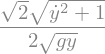

In [55]:
f = sqrt(1 + diff(y)**2) / sqrt(2 * g * y)
f

$$ \frac{\partial}{\partial y} f(x,y,y^{'}) = - \frac{1}{2} \sqrt{\frac{1 + y^{2}}{2g}} \frac{1}{y^{3/2}} $$

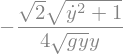

In [56]:
lhs = diff(f, y)
lhs

$$ \frac{\partial}{\partial y^{'}} f(x,y,y^{'}) = \frac{1}{\sqrt{2gy}} \frac{y^{'}}{\sqrt{1 + {y^{'}}^{2}}} $$

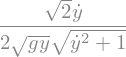

In [57]:
rhs = diff(f, diff(y))
rhs

Now we can substitude both equations from $\sqrt{2g}$

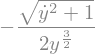

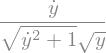

In [58]:
lhs, rhs = lhs.subs(sqrt(g), 1) * sqrt(2), rhs.subs(sqrt(g), 1) * sqrt(2)
display(lhs, rhs)

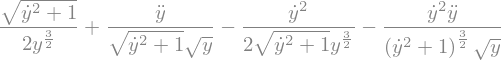

In [59]:
diff(rhs, t) - lhs

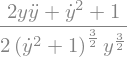

In [60]:
eq1 = (diff(rhs, t) - lhs).simplify()
eq1

In [61]:
subs_cons2 = 2 * y**(3/2) * (diff(y, t)**2 + 1)**(3/2)
subs_cons2

In [62]:
eq2 = (eq1 * subs_cons2).expand()
eq2

In [63]:
eq3 = ((eq2) * (diff(y, t))).expand()
eq3

In [64]:
eq4 = y + y * diff(y)**2 - C
eq4

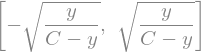

In [65]:
solve(eq4, 1/diff(y))

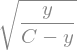

In [66]:
eq5 = solve(eq4, 1/diff(y))[1]
eq5

In [67]:
subs_par1 = [y,
             C * sin(t)**2]
subs_par1

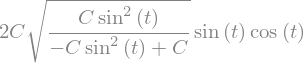

In [68]:
eq6 = eq5.subs(subs_par1[0], subs_par1[1]) * diff(subs_par1[1], t)
eq6

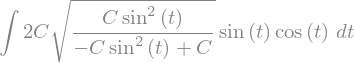

In [69]:
display(Integral(eq6, t))

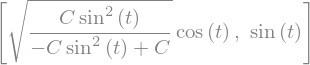

In [70]:
subs_par2 = [sqrt(subs_par1[1] / (C - subs_par1[1])) * cos(t), 
             sin(t)]
subs_par2

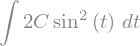

In [71]:
display(Integral(eq6.subs(subs_par2[0], subs_par2[1]), t))

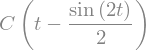

In [72]:
sol_set = [Integral(eq6.subs(subs_par2[0], subs_par2[1]), t).doit().simplify()]
sol_set[0]

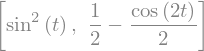

In [73]:
subs_par3 = [sin(t)**2,
             (1 - cos(2*t))/2]
subs_par3

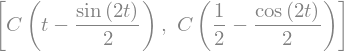

In [74]:
sol_set.append(subs_par1[1].subs(subs_par3[0], subs_par3[1]))
sol_set

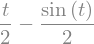

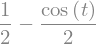

In [75]:
for i in range(len(sol_set)):
    sol_set[i] = sol_set[i].subs([(C, 1), (t, t/2)])
    display(sol_set[i])

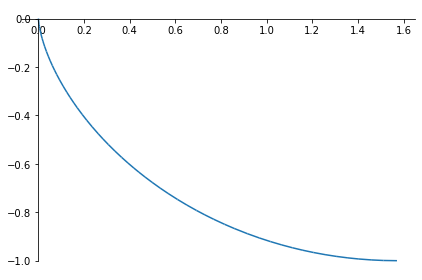

In [76]:
import sympy.plotting as plt
%matplotlib inline
plt.plot_parametric(sol_set[0], -sol_set[1], (t, 0, pi))